<div style = "font-size: 20px">
    <h1><center>
        LINEER REGRESYON
    </center></h1>
</div>

-----------------

# 1. Veri setini ve gerekli kütüphaneleri "import" edelim.

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')
import warnings
warnings.simplefilter(action = 'ignore', category = FutureWarning)

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

---------------

# 2. Verimizi DataFrame ve grafiksel olarak görelim.

In [6]:
data1 = pd.read_excel('Ex1.xlsx')
data2 = pd.read_excel('Ex2.xlsx')

In [7]:
df1 = data1.copy()
df2 = data2.copy()

In [8]:
df1.head()

,Population of the City,Profit of the food truck
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [9]:
df2.head()

,Size of the House,Number of Bedrooms,Price of the House
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [10]:
df1.shape, df2.shape

((97, 2), (47, 3))

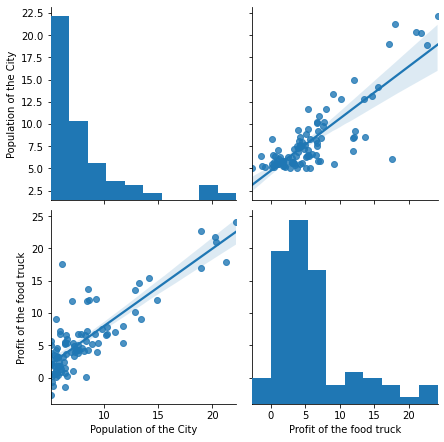

In [11]:
sns.pairplot(df1, size = 3, kind = 'reg');

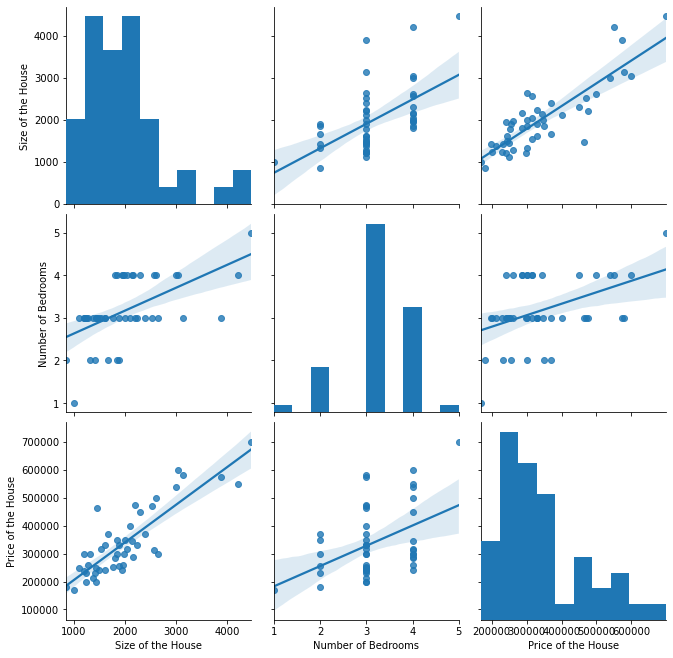

In [12]:
sns.pairplot(df2, size = 3, kind = 'reg');

-----------

# 3. X girdi matrisini normalize edelim.

<div style = "font-size: 16px">
    \begin{align}
    X_{normalize}=\frac{X-\ mean\left(X\right)}{std\left(X\right)}
    \end{align}
</div>

In [13]:
def featureNormalize(X):
    mean        = np.mean(X, axis = 0)
    std         = np.std(X, axis = 0)
    X_normalize = (X - mean) / std
    return X_normalize

------------------

# 4. Lineer regresyon için maliyet fonksiyonu ve gradyenik alçalma algoritmasını yazalım.

<div style = "font-size: 16px">
    \begin{align}
    h_{w{}}\left(x\right)=\ {w{}}_0x_0+{w{}}_1x_1+{w{}}_2x_2+…+{w{}}_nx_n=Xw
    \end{align}
</div>

<div style = "font-size: 16px">
   \begin{align}
   J(w)=\ \frac{1}{2m}\sum_{i=1}^m{(y^{(i)} - h_{w{}}\left(x^{(i)}\right))}^2
   \end{align} 
</div>

<div style = "font-size: 16px">
    \begin{align}
     J(w)=\ \frac{1}{2m}{np.sum((y-Xw)^2)}
    \end{align} 
</div>

<div style = "font-size: 16px">
    \begin{align}
    \phi{}\ :=\ y - Xw
    \end{align}
</div>

<div style = "font-size: 16px">
   \begin{align}
    {w{}}_j\
    :={w{}}_j+\frac{\alpha{}}{m}\sum_{i=1}^mx_j^{(i)}(y^{(i)} - h_{w{}}\left(x^{(i)}\right))
   \end{align}  
</div>

<div style = "font-size: 16px">
    \begin{align}
    w{}\ :=\ w{}+\ \frac{\alpha{}}{m}(X^T(y - Xw{}))
    \end{align}
</div>

In [14]:
def gradientDescent(X, y, learning_rate, epochs):
    m, n = X.shape
    w    = np.zeros((n, 1))
    J_history = np.zeros((epochs, 1))
    for epoch in range(epochs):
        # h_x = np.matmul(X, w)
        h_x              = np.dot(X, w)
        phi              = y - h_x
        J                = (1 / (2 * m)) * np.sum((phi ** 2))
        J_history[epoch] = J
        w                += (learning_rate / m) * np.dot(X.T, phi)
    return J_history, w

-------------

# 5. Normal denklem algoritması

<div style = "font-size: 16px">
    \begin{align}
     J(w)=\ \frac{1}{2m}{np.sum((y-Xw)^2)}
    \end{align} 
</div>

<div style = "font-size: 16px">
   \begin{align}
   w ̂=(X^T X)^{-1} X^T y
   \end{align} 
</div>

In [36]:
def normalEquation(X, y):
    m, n       = X.shape
    pseudo_pre = np.dot(X.T, X)
    pseudo_inv = np.linalg.pinv(pseudo_pre)
    _X_        = np.dot(pseudo_inv, X.T)
    w          = np.dot(_X_, y)
    y_pred     = np.dot(X, w)
    error_vec  = y - y_pred
    J          = (1 / (2 * m)) * np.sum((error_vec ** 2))
    return J, w

----------------

# 6. İşlem adımları...

In [16]:
df1.head()

,Population of the City,Profit of the food truck
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [17]:
df2.head()

,Size of the House,Number of Bedrooms,Price of the House
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [18]:
X1 = df1.iloc[:, 0:1].values

In [19]:
X1[:10]

array([[6.1101],
       [5.5277],
       [8.5186],
       [7.0032],
       [5.8598],
       [8.3829],
       [7.4764],
       [8.5781],
       [6.4862],
       [5.0546]])

In [20]:
X2 = df2.iloc[:, 0:2].values

In [21]:
X2[:10]

array([[2104,    3],
       [1600,    3],
       [2400,    3],
       [1416,    2],
       [3000,    4],
       [1985,    4],
       [1534,    3],
       [1427,    3],
       [1380,    3],
       [1494,    3]], dtype=int64)

In [22]:
y1 = df1.iloc[:, 1:2].values
y2 = df2.iloc[:, 2:3].values

In [23]:
y1[:10]

array([[17.592 ],
       [ 9.1302],
       [13.662 ],
       [11.854 ],
       [ 6.8233],
       [11.886 ],
       [ 4.3483],
       [12.    ],
       [ 6.5987],
       [ 3.8166]])

In [24]:
y2[:10]

array([[399900],
       [329900],
       [369000],
       [232000],
       [539900],
       [299900],
       [314900],
       [198999],
       [212000],
       [242500]], dtype=int64)

In [25]:
ones1 = np.ones((len(X1), 1), dtype = int)
X1    = np.concatenate([ones1, X1], axis = 1)

In [26]:
X1[:10]

array([[1.    , 6.1101],
       [1.    , 5.5277],
       [1.    , 8.5186],
       [1.    , 7.0032],
       [1.    , 5.8598],
       [1.    , 8.3829],
       [1.    , 7.4764],
       [1.    , 8.5781],
       [1.    , 6.4862],
       [1.    , 5.0546]])

In [27]:
X2_scaled = featureNormalize(X2)

In [28]:
X2_scaled[:10]

array([[ 0.13141542, -0.22609337],
       [-0.5096407 , -0.22609337],
       [ 0.5079087 , -0.22609337],
       [-0.74367706, -1.5543919 ],
       [ 1.27107075,  1.10220517],
       [-0.01994505,  1.10220517],
       [-0.59358852, -0.22609337],
       [-0.72968575, -0.22609337],
       [-0.78946678, -0.22609337],
       [-0.64446599, -0.22609337]])

In [29]:
ones2     = np.ones((len(X2_scaled), 1), dtype = int)
X2_scaled = np.concatenate([ones2, X2_scaled], axis = 1)

In [30]:
X2_scaled[:10]

array([[ 1.        ,  0.13141542, -0.22609337],
       [ 1.        , -0.5096407 , -0.22609337],
       [ 1.        ,  0.5079087 , -0.22609337],
       [ 1.        , -0.74367706, -1.5543919 ],
       [ 1.        ,  1.27107075,  1.10220517],
       [ 1.        , -0.01994505,  1.10220517],
       [ 1.        , -0.59358852, -0.22609337],
       [ 1.        , -0.72968575, -0.22609337],
       [ 1.        , -0.78946678, -0.22609337],
       [ 1.        , -0.64446599, -0.22609337]])

In [31]:
cost1, weight1 = gradientDescent(X1, y1, learning_rate = 0.01, epochs = 1000)

In [32]:
cost2, weight2 = gradientDescent(X2_scaled, y2, learning_rate = 0.01, epochs = 1000)

In [37]:
cost1_normal , weight1_normal = normalEquation(X1, y1)

In [38]:
cost2_normal, weight2_normal = normalEquation(X2_scaled, y2)

In [39]:
cost1[-10:-1]

array([[4.51738791],
       [4.51724233],
       [4.51709728],
       [4.51695275],
       [4.51680874],
       [4.51666525],
       [4.51652227],
       [4.51637981],
       [4.51623786]])

In [40]:
cost1_normal

4.476971375975179

In [41]:
cost2[-10:-1]

array([[2.04351915e+09],
       [2.04351705e+09],
       [2.04351496e+09],
       [2.04351290e+09],
       [2.04351085e+09],
       [2.04350882e+09],
       [2.04350681e+09],
       [2.04350482e+09],
       [2.04350285e+09]])

In [42]:
cost2_normal

2043280050.6028285

In [43]:
weight1

array([[-3.24140214],
       [ 1.1272942 ]])

In [44]:
weight1_normal

array([[-3.89578088],
       [ 1.19303364]])

In [45]:
weight2

array([[340397.96353532],
       [108742.65627238],
       [ -5873.22993383]])

In [46]:
weight2_normal

array([[340412.65957447],
       [109447.79646964],
       [ -6578.35485416]])

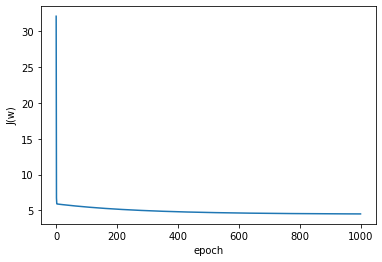

In [47]:
plt.plot(range(1000), cost1)
plt.ylabel('J(w)')
plt.xlabel('epoch');

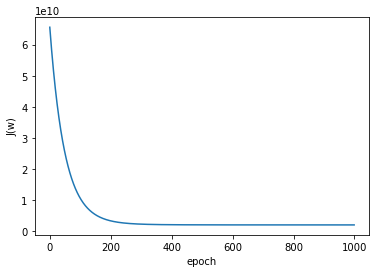

In [48]:
plt.plot(range(1000), cost2)
plt.ylabel('J(w)')
plt.xlabel('epoch');

-------------

# 7. Sınıf(Class) haline getirelim.

In [49]:
class LinearReg(object):
    
    def __init__(self, epochs = 1000, learning_rate = 0.01):
        self.epochs        = epochs
        self.learning_rate = learning_rate
        
    def fit(self, X, y):
        m, n           = X.shape
        self.w         = np.zeros((n, 1))
        self.J_history = np.zeros((self.epochs, 1))
        for epoch in range(self.epochs):
            h_x    = np.dot(X, self.w)
            phi    = y - h_x
            self.w += (self.learning_rate / m) * np.dot(X.T, phi)
    
    def predict(self, X):
        return np.dot(X, self.w)

In [50]:
class NormalEquation(object):
    
    def fit(self, X, y):
        m, n = X.shape
        pseudo_pre = np.dot(X.T, X)
        pseudo_inv = np.linalg.pinv(pseudo_pre)
        _X_        = np.dot(pseudo_inv, X.T)
        self.w     = np.dot(_X_, y)
        
    def predict(self, X):
        return np.dot(X, self.w)

In [51]:
linear_reg1 = LinearReg()
linear_reg2 = LinearReg()
normal_eq1 = NormalEquation()
normal_eq2 = NormalEquation()

In [53]:
linear_reg1.fit(X1, y1)

In [54]:
linear_reg2.fit(X2_scaled, y2)

In [56]:
linear_reg1.predict(X1)[:10]

array([[3.64647816],
       [2.98994202],
       [6.36156625],
       [4.65326461],
       [3.36431642],
       [6.20859243],
       [5.18670023],
       [6.42864025],
       [4.07045351],
       [2.45661913]])

In [58]:
linear_reg2.predict(X2_scaled)[:10]

array([[356016.32393534],
       [286306.1786691 ],
       [396957.20290123],
       [268657.8458097 ],
       [472144.06836133],
       [331755.58136682],
       [277177.46916995],
       [262377.8946789 ],
       [255877.14700526],
       [271644.91795834]])

In [59]:
y_pred1 = linear_reg1.predict(X1)

In [60]:
y_pred2 = linear_reg2.predict(X2_scaled)

-----------

# 8. Regresyon çizdirme işlemi

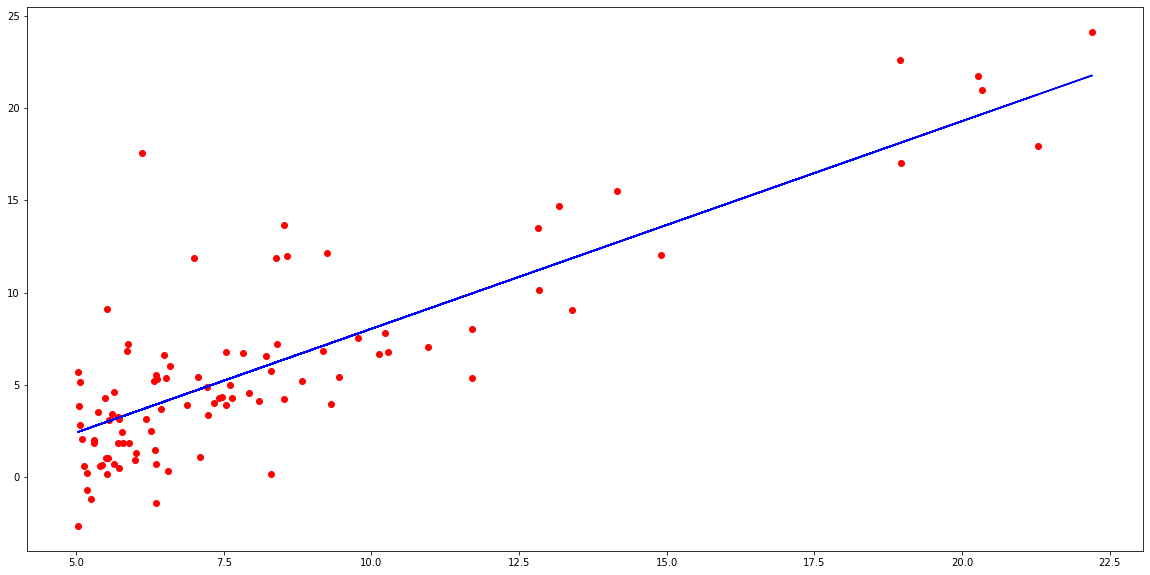

In [62]:
plt.scatter(X1[:, 1], y1, color = 'red')
plt.plot(X1[:, 1], y_pred1, color = 'blue')
plt.gcf().set_size_inches(20, 10)
plt.show()

-----------